In [1]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

Setting global variables.

In [2]:
PATH_TO_CSV = pathlib.Path('/home/relogu/Desktop/OneDrive/UNIBO/Magistrale/Federated Learning Project/ray_results')
FILENAMES_DICT = {
    'mnist': {
        'sgd': 'mnist_cl_sgd.csv',
        'adam': 'mnist_cl_adam.csv',
        'yogi': 'mnist_cl_yogi.csv',
    },
    'bmnist': {
        'sgd': 'bmnist_cl_sgd.csv',
        'adam': 'bmnist_cl_adam.csv',
        'yogi': 'bmnist_cl_yogi.csv',
    },
}
COLORS_DICT = {
    'sgd': 'blue',
    'adam': 'orange',
    'yogi': 'green',
}
DATASET_DICT = {
    'mnist': '--',
    'bmnist': '-.',
}
LINEARS_DICT = {
    'dec': '--',
    'curves': '-.',
    'google': ':',
}
BATCH_DICT = {
    8: 'blue',
    16: 'orange',
    32: 'green',
    64: 'red',
}
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

Get all clustering results.

In [3]:
df = pd.DataFrame()
key = 'mnist'
# optmizer loop
for key in FILENAMES_DICT.keys():
    for kkey in FILENAMES_DICT[key].keys():
        if (PATH_TO_CSV/FILENAMES_DICT[key][kkey]).exists():
            tmp = pd.read_csv(PATH_TO_CSV/FILENAMES_DICT[key][kkey])
            tmp['dataset'] = key 
            tmp['optimizer'] = kkey
            df = df.append(tmp)
#df['lr'] = np.log(df['lr'].to_numpy())
# df['ray/tune/cl_recon'] = np.log(df['ray/tune/cl_recon'].to_numpy())
df['ray/tune/data_calinski_harabasz'] = np.log(df['ray/tune/data_calinski_harabasz'].to_numpy())
df['ray/tune/feat_calinski_harabasz'] = np.log(df['ray/tune/feat_calinski_harabasz'].to_numpy())
df.head()


/tmp/ipykernel_45321/829201413.py:13: RuntimeWarning: divide by zero encountered in log
  df['ray/tune/data_calinski_harabasz'] = np.log(df['ray/tune/data_calinski_harabasz'].to_numpy())
/tmp/ipykernel_45321/829201413.py:14: RuntimeWarning: divide by zero encountered in log
  df['ray/tune/feat_calinski_harabasz'] = np.log(df['ray/tune/feat_calinski_harabasz'].to_numpy())


,lr,dec_batch_size,ray/tune/accuracy,ray/tune/cycle_accuracy,ray/tune/cl_recon,ray/tune/delta_label,ray/tune/cos_sil_score,dataset,optimizer,ray/tune/eucl_sil_score,ray/tune/data_calinski_harabasz,ray/tune/feat_calinski_harabasz
0,0.000315,64.0,0.791733,0.954283,4.864348,0.030283,0.126179,mnist,sgd,NaN,NaN,NaN
1,0.629260,128.0,0.384033,0.326750,64.494385,0.598433,0.061119,mnist,sgd,NaN,NaN,NaN
2,0.278756,256.0,0.816800,0.712633,2.861657,0.066817,0.113552,mnist,sgd,NaN,NaN,NaN
3,0.000157,512.0,0.794583,0.974233,0.136030,0.005967,0.122780,mnist,sgd,NaN,NaN,NaN
4,0.000080,64.0,0.792983,0.957283,2.199791,0.017683,0.124575,mnist,sgd,NaN,NaN,NaN


Ordering results.
We want the highest possible value for ``accuracy``, lowest ``cl_recon``, highest ``cycle_accuracy``.

In [4]:
df.sort_values(
    axis=0,
    by=['ray/tune/accuracy', 'ray/tune/cl_recon', 'ray/tune/cycle_accuracy',],
    ascending=[False, True, False],
    inplace=True
    )
df[:10]

,lr,dec_batch_size,ray/tune/accuracy,ray/tune/cycle_accuracy,ray/tune/cl_recon,ray/tune/delta_label,ray/tune/cos_sil_score,dataset,optimizer,ray/tune/eucl_sil_score,ray/tune/data_calinski_harabasz,ray/tune/feat_calinski_harabasz
44,0.042702,64.0,0.867750,0.807717,77.658783,0.025400,0.104539,mnist,sgd,NaN,NaN,NaN
18,0.001017,256.0,0.858067,0.607867,2.805483,0.020133,0.110045,mnist,adam,0.961749,7.545760,14.540134
196,0.027145,64.0,0.855200,0.895117,69.041321,0.016733,0.112254,mnist,sgd,NaN,NaN,NaN
37,0.000595,128.0,0.855167,0.562267,6.021429,0.019500,0.111474,mnist,adam,0.962833,7.546175,14.714371
183,0.144847,512.0,0.853850,0.993967,3.422688,0.012833,0.112771,mnist,sgd,NaN,NaN,NaN
43,0.001272,512.0,0.853517,0.512300,1.317731,0.011367,0.110791,mnist,adam,0.959696,7.549195,14.416531
157,0.000380,128.0,0.852983,0.612000,6.383742,0.015300,0.113003,mnist,adam,0.955849,7.555798,14.358184
168,0.000302,64.0,0.850850,0.503967,12.973760,0.010067,0.110302,mnist,adam,0.956820,7.546981,14.506323
189,0.000655,128.0,0.849933,0.456433,7.142327,0.032733,0.109790,mnist,adam,0.951963,7.543713,14.165315
190,0.001691,256.0,0.849883,0.638450,2.746028,0.101717,0.100045,mnist,adam,0.946370,7.492721,13.689865


Plotting scatter matrix for each optimizer.

/tmp/ipykernel_45321/2171607658.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(tmp, ax=ax, grid=True, alpha=1.0)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


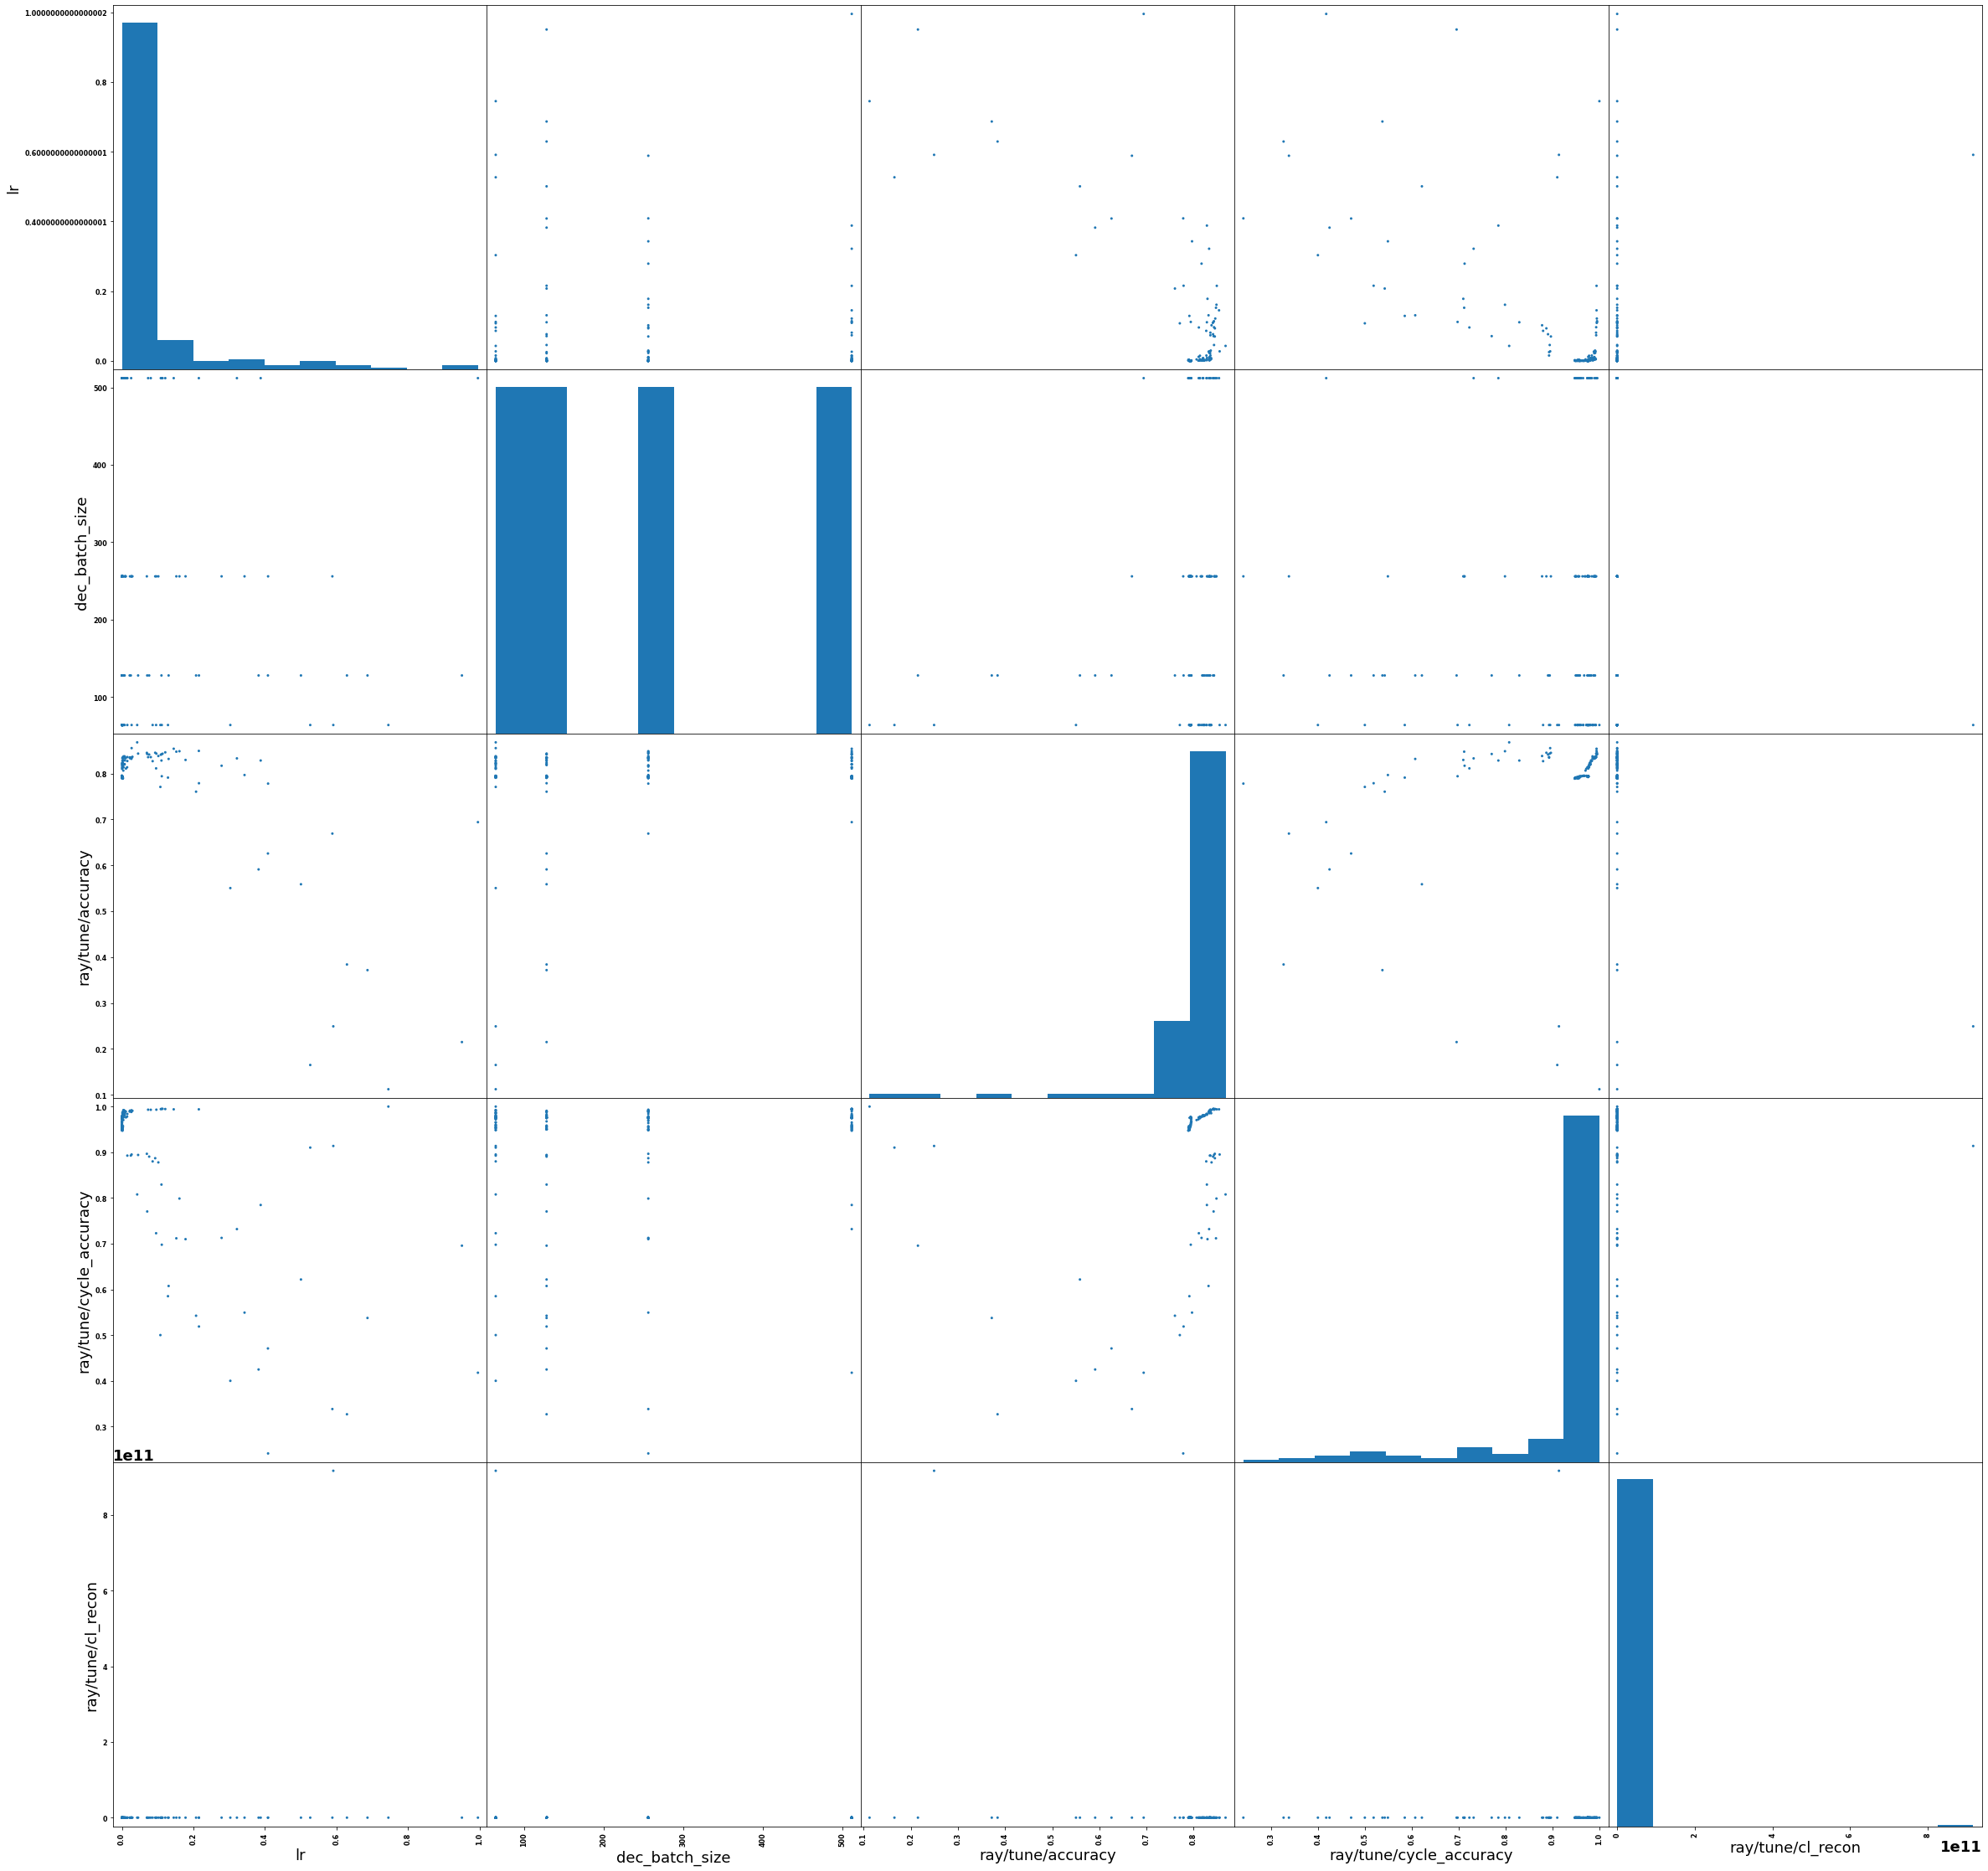

In [5]:
figure, ax = plt.subplots(1, 1, figsize=(40,40))
tmp = df[df['optimizer']=='sgd']
tmp = tmp.drop(
    labels=['ray/tune/delta_label','ray/tune/cos_sil_score','dataset','optimizer','ray/tune/eucl_sil_score','ray/tune/data_calinski_harabasz','ray/tune/feat_calinski_harabasz'],
    axis=1,
    inplace=False)
tmp = tmp[~tmp.isin([np.nan, np.inf, -np.inf]).any(1)]
pd.plotting.scatter_matrix(tmp, ax=ax, grid=True, alpha=1.0)
plt.show()
df[df['optimizer']=='sgd'].head().round(5).to_csv('{}_cl_sgd.csv'.format(key))

/tmp/ipykernel_45321/460776770.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(tmp, ax=ax, grid=True, alpha=1.0)


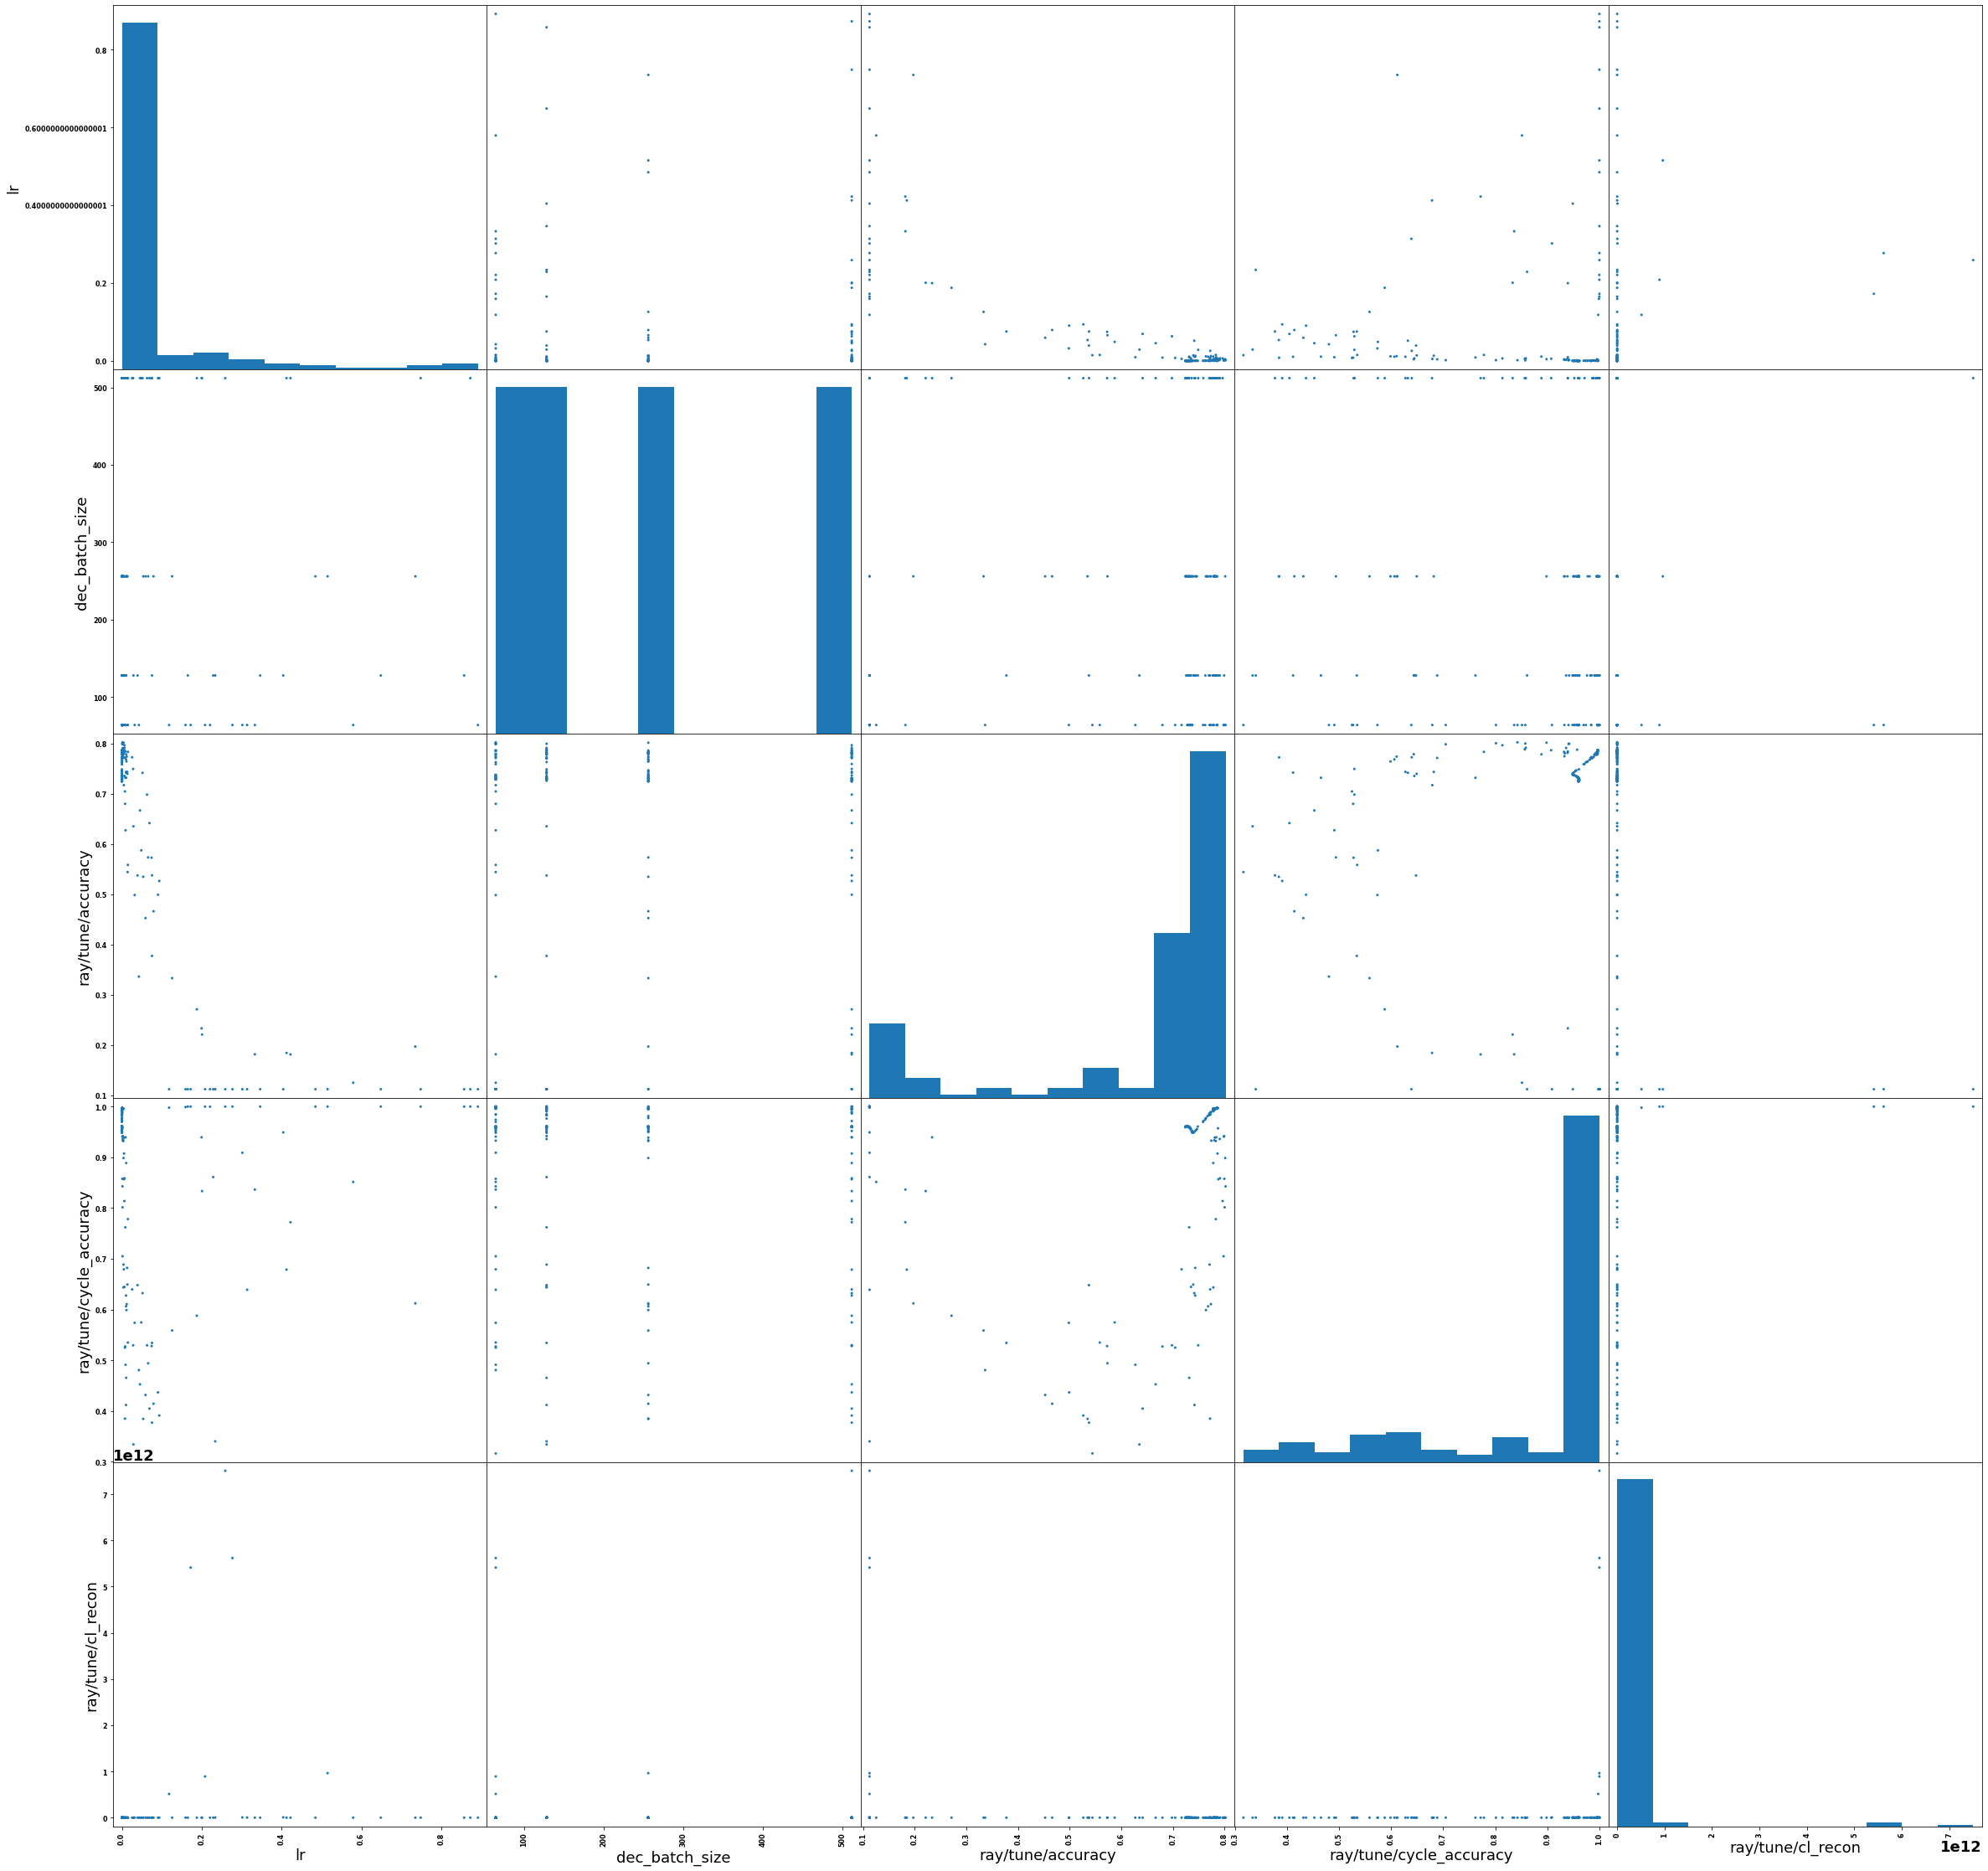

,lr,dec_batch_size,ray/tune/accuracy,ray/tune/cycle_accuracy,ray/tune/cl_recon,ray/tune/delta_label,ray/tune/cos_sil_score,dataset,optimizer,ray/tune/eucl_sil_score,ray/tune/data_calinski_harabasz,ray/tune/feat_calinski_harabasz
4,0.001485,64.0,0.801900,0.842667,1.321794e+01,0.011317,0.121937,mnist,yogi,0.969776,7.554335,14.605034
10,0.004079,256.0,0.801233,0.898500,3.198881e+00,0.025150,0.120450,mnist,yogi,0.961118,7.556086,14.334363
156,0.001551,64.0,0.800150,0.801367,1.305863e+01,0.016417,0.120340,mnist,yogi,0.965094,7.551049,14.437297
12,0.001155,64.0,0.799567,0.857700,1.449286e+01,0.009367,0.122551,mnist,yogi,0.969424,7.559317,14.860382
41,0.002412,128.0,0.799100,0.941883,6.443905e+00,0.015533,0.123225,mnist,yogi,0.965667,7.560320,14.466060
...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.208326,64.0,0.112367,0.999967,8.917980e+11,1.000000,0.000000,mnist,yogi,0.000000,-inf,-inf
34,0.515278,256.0,0.112367,0.999983,9.629653e+11,0.000000,0.000000,mnist,yogi,0.000000,-inf,-inf
108,0.172271,64.0,0.112367,1.000000,5.412282e+12,0.000000,0.000000,mnist,yogi,0.000000,-inf,-inf
192,0.276932,64.0,0.112367,1.000000,5.618191e+12,0.000000,0.000000,mnist,yogi,0.000000,-inf,-inf


In [6]:
figure, ax = plt.subplots(1, 1, figsize=(40,40))
tmp = df[df['optimizer']=='yogi']
tmp = tmp.drop(
    labels=['ray/tune/delta_label','ray/tune/cos_sil_score','dataset','optimizer','ray/tune/eucl_sil_score','ray/tune/data_calinski_harabasz','ray/tune/feat_calinski_harabasz'],
    axis=1,
    inplace=False)
tmp = tmp[~tmp.isin([np.nan, np.inf, -np.inf]).any(1)]
pd.plotting.scatter_matrix(tmp, ax=ax, grid=True, alpha=1.0)
plt.show()
df[df['optimizer']=='yogi'].head().round(5).to_csv('{}_cl_yogi.csv'.format(key))
df[df['optimizer']=='yogi']

/tmp/ipykernel_45321/4047434217.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(tmp, ax=ax, grid=True, alpha=1.0)


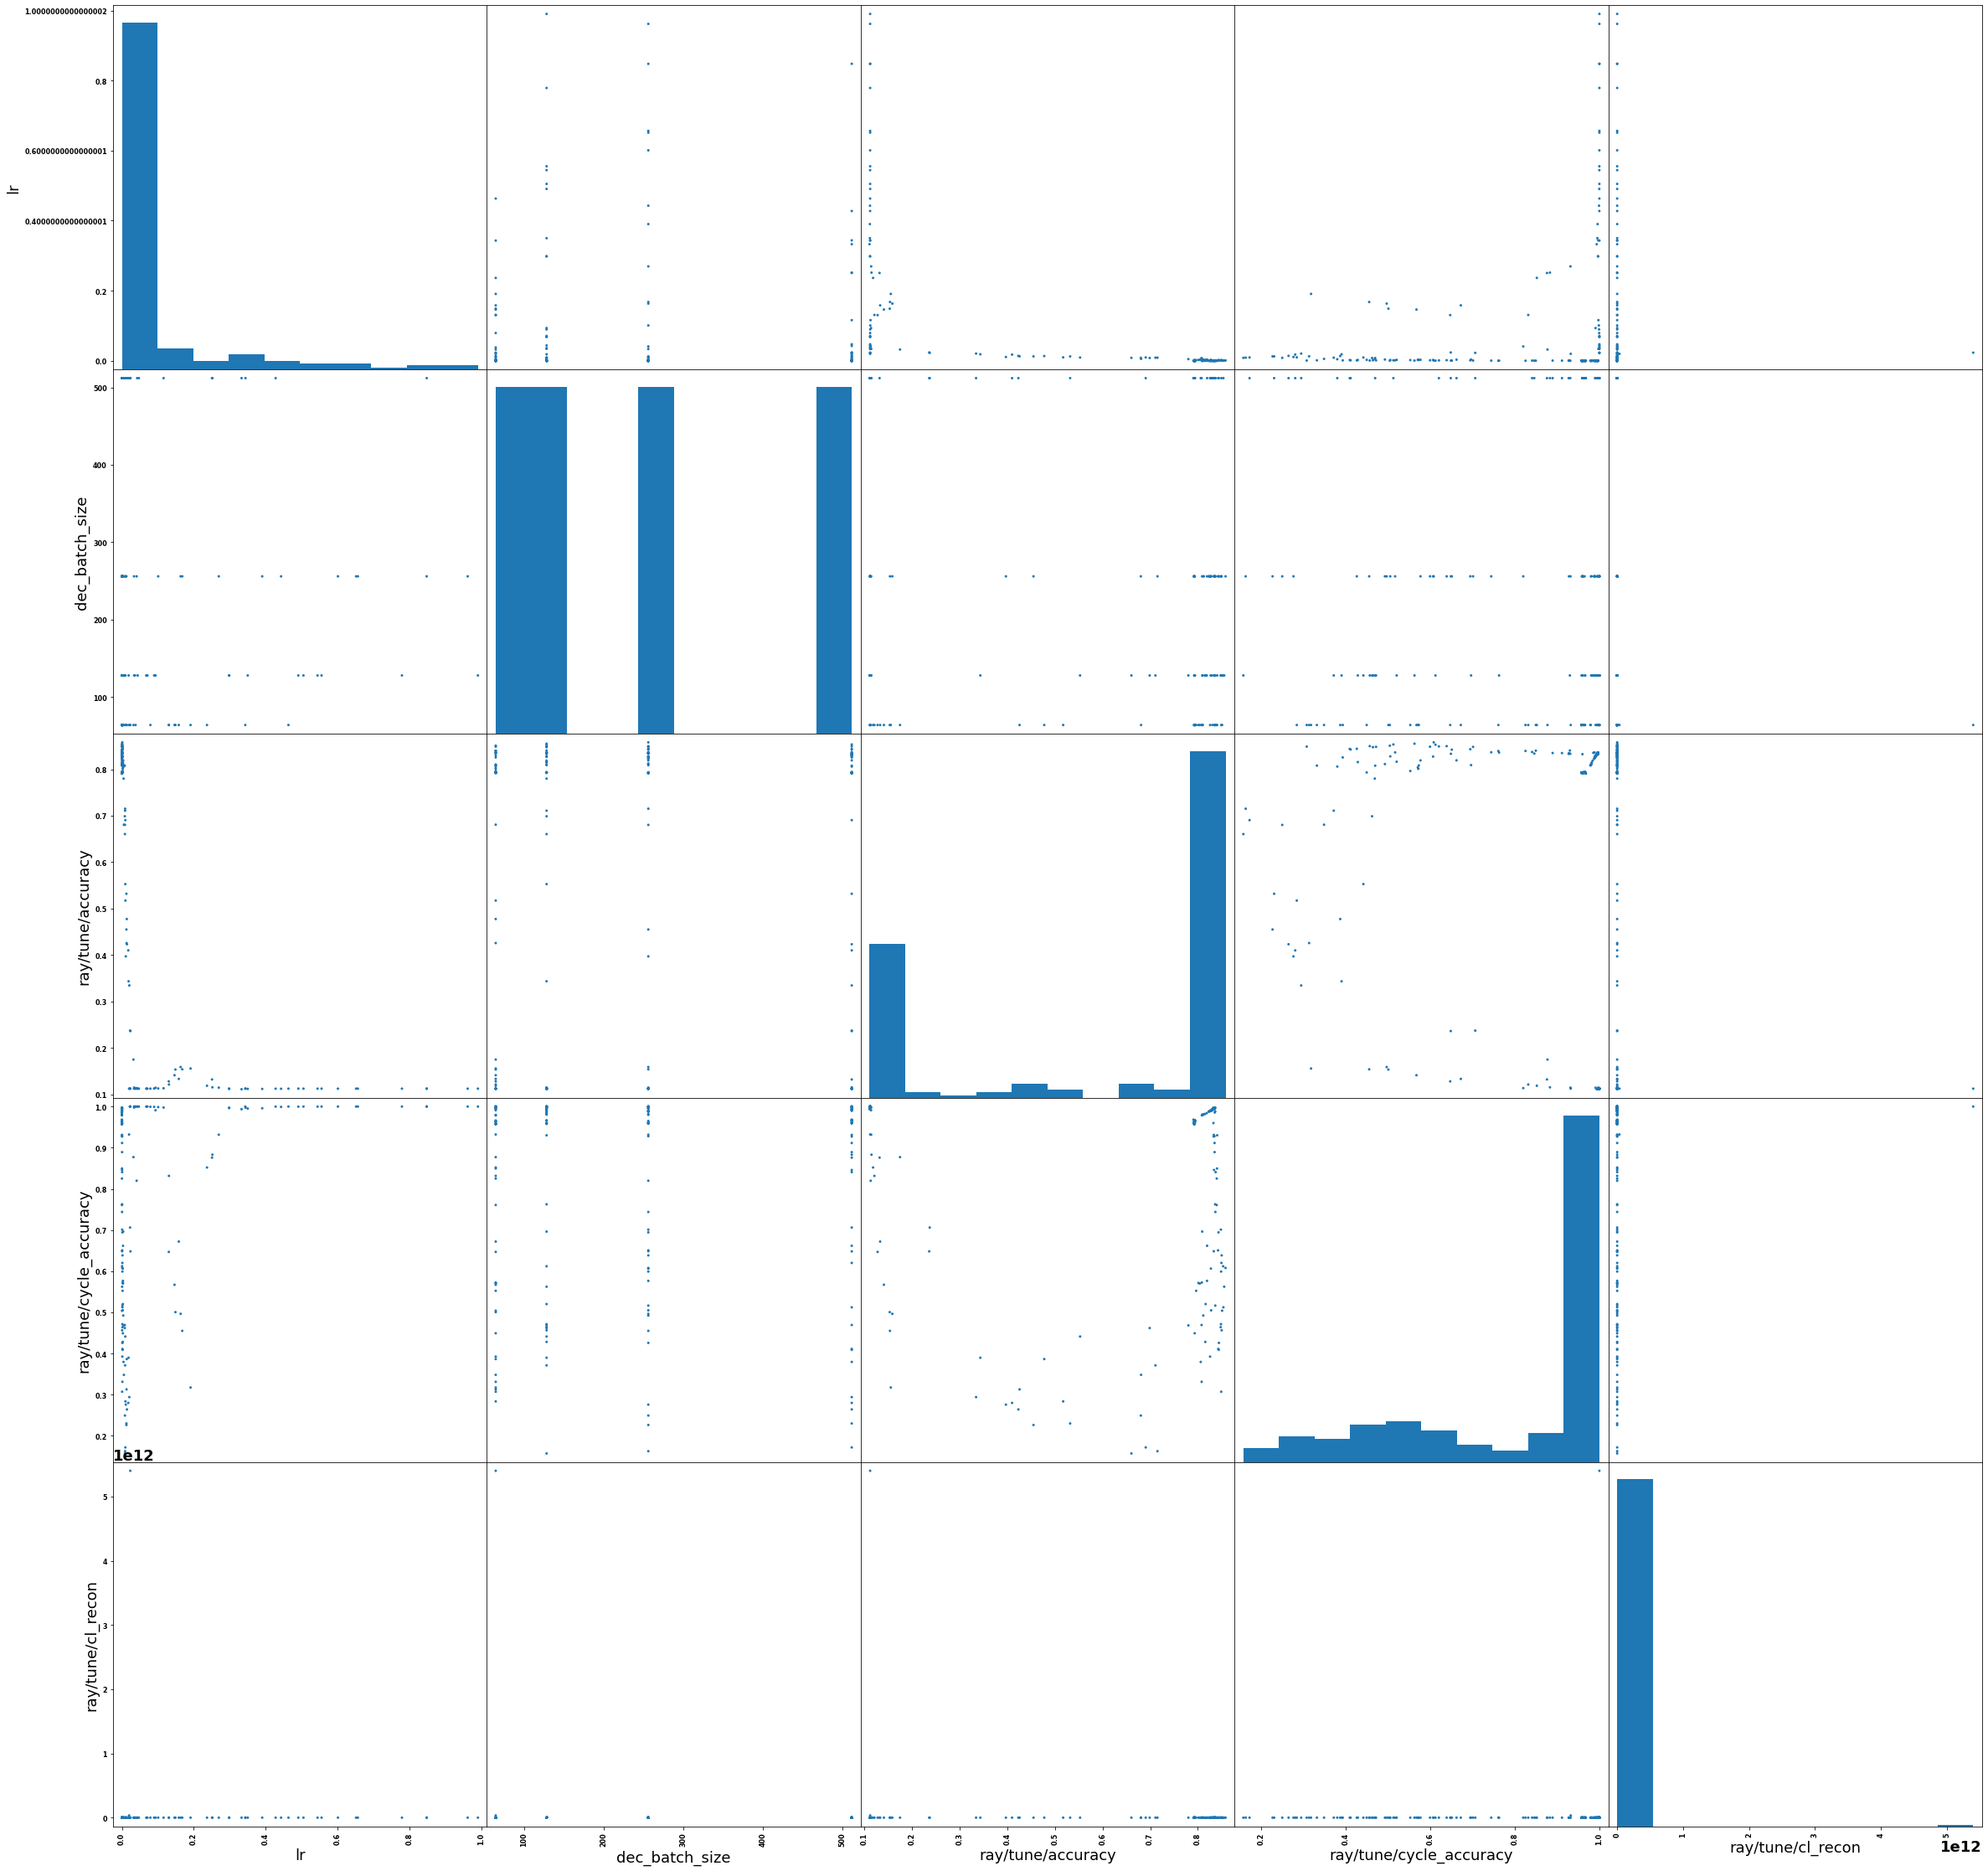

In [7]:
figure, ax = plt.subplots(1, 1, figsize=(40,40))
tmp = df[df['optimizer']=='adam']
tmp = tmp.drop(
    labels=['ray/tune/delta_label','ray/tune/cos_sil_score','dataset','optimizer','ray/tune/eucl_sil_score','ray/tune/data_calinski_harabasz','ray/tune/feat_calinski_harabasz'],
    axis=1,
    inplace=False)
tmp = tmp[~tmp.isin([np.nan, np.inf, -np.inf]).any(1)]
pd.plotting.scatter_matrix(tmp, ax=ax, grid=True, alpha=1.0)
plt.show()
df[df['optimizer']=='adam'].head().round(5).to_csv('{}_cl_adam.csv'.format(key))

Get results of using scalers and different values of $\alpha$, for both MNIST and BMNIST.

In [3]:
df = pd.read_csv(PATH_TO_CSV/'mnist_cl_arch_alpha_scaler.csv')
df.sort_values(
    axis=0,
    by=['ray/tune/accuracy', 'ray/tune/cl_recon', 'ray/tune/cycle_accuracy',],
    ascending=[False, True, False],
    inplace=True)
df.round(5).to_csv('mnist_cl_arch_alpha_scaler.csv')

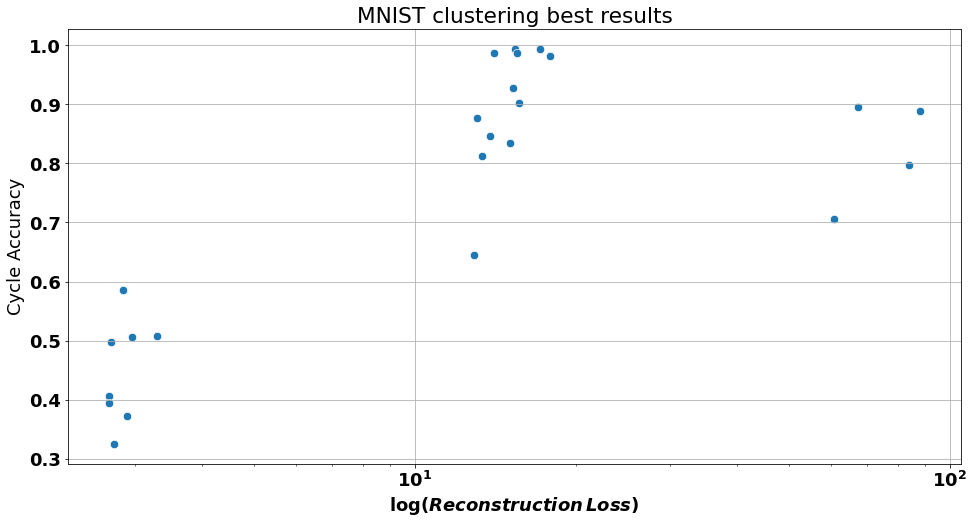

In [7]:
figure, ax = plt.subplots(1, 1, figsize=(16,8))
sns.scatterplot(data=df, x='ray/tune/cl_recon', y='ray/tune/cycle_accuracy', ax=ax,s=70)
plt.xscale('log')
plt.xlabel(r'$\log(Reconstruction\,Loss)$')
plt.ylabel('Cycle Accuracy')
plt.title('MNIST clustering best results')
plt.grid()
plt.savefig('cacc_vs_reconloss.png')

In [ ]:
df = pd.read_csv(PATH_TO_CSV/'bmnist_cl_arch_alpha_scaler.csv')
df.sort_values(
    axis=0,
    by=['ray/tune/accuracy', 'ray/tune/cl_recon', 'ray/tune/cycle_accuracy',],
    ascending=[False, True, False],
    inplace=True)
df.round(5).to_csv('bmnist_cl_arch_alpha_scaler.csv')

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(16,8))
sns.scatterplot(data=df, x='ray/tune/cl_recon', y='ray/tune/cycle_accuracy', ax=ax,)
plt.xscale('log')
plt.xlabel(r'$\log(Reconstruction\,Loss)$')
plt.ylabel('Cycle Accuracy')
plt.title('BMNIST clustering best results')
plt.grid()

Plotting datapoint representation.